In [23]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [24]:
accident_data = pd.read_csv('data-cleaned.csv')

In [25]:
# Additional preprocessing- doesnt add value to our data since we have latitude and longitude

accident_data = accident_data.drop('District_Area', axis=1)
X = accident_data.drop('Accident_Severity', axis=1)
y=accident_data['Accident_Severity']


In [26]:
# Final preprocessing steps- standardizing the data to account for outliers

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
X_train, temp_X, y_train, temp_y = train_test_split(X, y, test_size=0.4, random_state=104)
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=104)

In [28]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(382815, 42)
(191407, 42)
(191408, 42)


In [48]:
from sklearn.linear_model import LogisticRegression

# Running logistic regression
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
history = logreg.fit(X_train, y_train)  # 20% of the data will be used for validation

In [34]:
yhat_train = logreg.predict(X_train)
yhat_val = logreg.predict(X_val)
yhat_test = logreg.predict(X_test)

In [35]:
print("--------------------------TRAINING ACCURACY--------------------------")
print(classification_report(y_train, yhat_train))
print("--------------------------VALIDATION ACCURACY--------------------------")
print(classification_report(y_val, yhat_val))
print("--------------------------TESTING ACCURACY--------------------------")
print(classification_report(y_test, yhat_test))

--------------------------TRAINING ACCURACY--------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    326155
           1       0.41      0.00      0.00     51561
           2       0.27      0.00      0.00      5099

    accuracy                           0.85    382815
   macro avg       0.51      0.33      0.31    382815
weighted avg       0.79      0.85      0.78    382815

--------------------------VALIDATION ACCURACY--------------------------
              precision    recall  f1-score   support

           0       0.85      1.00      0.92    162834
           1       0.44      0.00      0.00     26014
           2       0.14      0.00      0.00      2559

    accuracy                           0.85    191407
   macro avg       0.48      0.33      0.31    191407
weighted avg       0.79      0.85      0.78    191407

--------------------------TESTING ACCURACY--------------------------
              precision    

In [51]:
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

mse_train = mean_squared_error(y_train, yhat_train)
mse_val = mean_squared_error(y_val, yhat_val)
mse_test = mean_squared_error(y_test, yhat_test)

print("Training Mean Squared Error:", mse_train)
print("Validation Mean Squared Error:", mse_val)
print("Testing Mean Squared Error:", mse_test)

Training Mean Squared Error: 0.18787926282930398
Validation Mean Squared Error: 0.18933999279023234
Testing Mean Squared Error: 0.1864185404998746


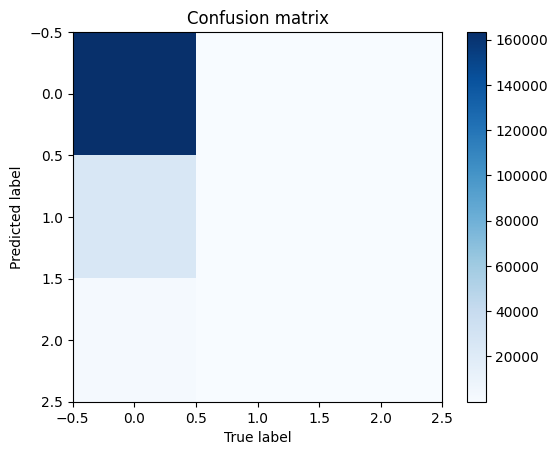

In [41]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, yhat_test)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [52]:
training_accuracy = accuracy_score(y_train, yhat_train)
print("Test Accuracy:", training_accuracy)
accuracy = accuracy_score(test_y, yhat_test)
print("Test Accuracy:", accuracy)
val_accuracy = accuracy_score(y_val, yhat_val)
print("Validation Accuracy:", val_accuracy)

Test Accuracy: 0.8519545994801666
Test Accuracy: 0.8532193011786341
Validation Accuracy: 0.8506898911743039


#### Distribution of Data

In [55]:
import seaborn as sns

sns.barplot(y_test)

### Analysis of Loss, Accuracy, Classification Reports, and Confusion Matrix

Since all 3 accuracies are close to each other (around 85%), and at the same the mean squared error is also close (around 0.18), we can say that there is no **major** underfitting or overfitting that can be observed. 

While this would look like the model is performing well on a surface level, if we take a look at the classification reports and the confusion matrix plotted, we can clearly see that there are definitely issues with this model! The recall scores for classes 1 and 2 (or 'Severe' and 'Fatal') accidents are 0. This means that we are rarely predicting those values and 'Mild' accidents are being predicted the most. It is also worth noting that in our dataset, majority of the accidents our mild and this could result in a bias in the data. Due to this bias, it is reasonable to assume that our logistic regression model is biased too and there can be a lot of improvements that can be made here. 

<Axes: >

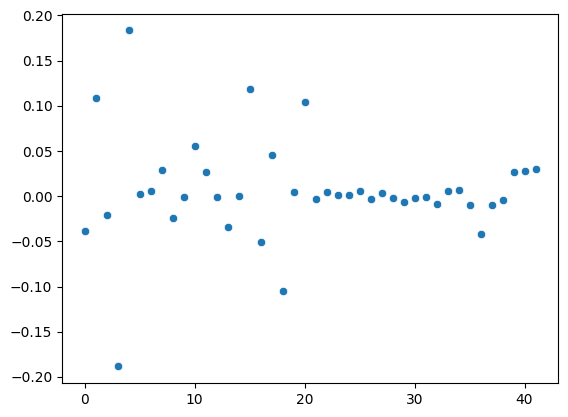

In [44]:
sns.scatterplot(x = list(range(0,len(logreg.coef_[0]))),y = logreg.coef_[0])

#### Interpretation of Model Coefficients

These coefficients represent the effect that they have on the output. This implies that the greater the absolute value of our coefficient, the greater the effect that it has on the model. On the face of it, it seems like all 42 features in our input data have an effect on the output to some extent. Values closer to 0 have a smaller effect. The relation between all these variables is probably very complicated which would be better captured by a more complex machine learning model like a DNN/ANN. The features that have the largest effect on the output are those between 0.10 to 0.20 and -0.10 to -0.20. We have 4 features that are in this range!

### Future Plans

Having looked at the advantages and disadvantages of using a logistic regression model, we will be exploring other models for the rest of the milestones to compare their performances to each other and determine the best one.

It is worth noting that this is a classification problem since we are classifying our data into 3 classes of severity- hence it is important to use models that are supposed to be used specifically for this use case.  

Our next step would be to compare our results from this model to those of other classification models like Neural Networks, Decision Trees, Random Forest, and SVM's. By comparing our results, we would get a better understanding of a range of classification models, which would further help us determine which one works the best for our data.